In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [52]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
%cd '/content/gdrive/My Drive/CV_Project/yolov5-master'

/content/gdrive/My Drive/CV_Project/yolov5-master


In [10]:
%pip install -qr requirements.txt

In [56]:
DIR = '/content/gdrive/My Drive/CV_Project/yolov5-master/'

In [11]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 256 --batch 16 --epochs 50 --data '/content/gdrive/My Drive/CV_Project/yolov5-master/data/coral_yolov5.yaml' --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/gdrive/My Drive/CV_Project/yolov5-master/data/coral_yolov5.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=256, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2022-11-6 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, 

In [15]:
!python detect.py --weights '/content/gdrive/My Drive/CV_Project/yolov5-master/runs/train/exp8/weights/best.pt' --img 256 --conf 0.25 --source yolo-dataset/test/images

detect: weights=['/content/gdrive/My Drive/CV_Project/yolov5-master/runs/train/exp8/weights/best.pt'], source=yolo-dataset/test/images, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2022-11-6 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/222 /content/gdrive/My Drive/CV_Project/yolov5-master/yolo-dataset/test/images/elkhorn-1-13-44_jpg.rf.4f89e132266eefa9465dff43e7efda01.jpg: 256x256 1 E, 10.6ms
image 2/222 /content/gdrive/My Drive/CV_Project/yolov5-master/yolo-dataset/test/images/elkhorn-1-14-57_jpg.rf.2d1fd26f5c2ec8

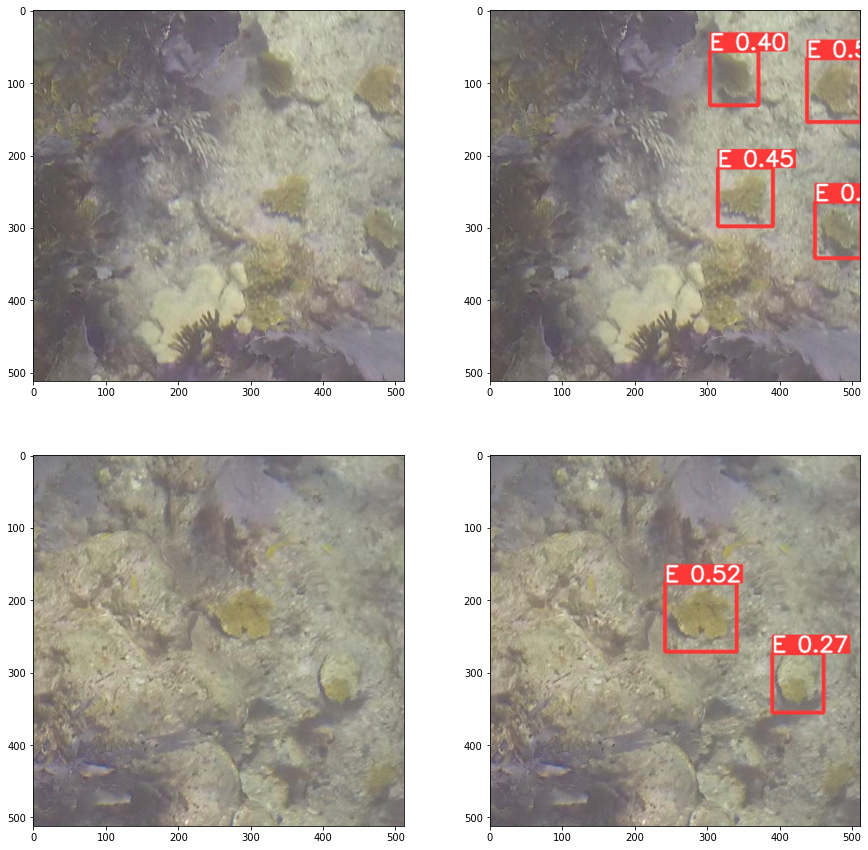

In [48]:
# Some Labelled and Predicted Elkhorn Images
Img_DIR = '/content/gdrive/My Drive/CV_Project/yolov5-master/yolo-dataset/test/images/'
Pred_Img_DIR = '/content/gdrive/My Drive/CV_Project/yolov5-master/runs/detect/exp7/'

elk_Img1 = plt.imread(Img_DIR + 'elkhorn-5-41-11_jpg.rf.91cabdfbfaca42502fbc3712ce7cf0c6.jpg')
pred_Elk_Img1 = plt.imread(Pred_Img_DIR + 'elkhorn-5-41-11_jpg.rf.91cabdfbfaca42502fbc3712ce7cf0c6.jpg')

elk_Img2 = plt.imread(Img_DIR + 'elkhorn-5-36-18_jpg.rf.2c41d1f8ffcb6f21b724af257b3f5f76.jpg')
pred_Elk_Img2 = plt.imread(Pred_Img_DIR + 'elkhorn-5-36-18_jpg.rf.2c41d1f8ffcb6f21b724af257b3f5f76.jpg')

fig, axis = plt.subplots(2, 2, figsize=(15, 15))

axis[0, 0].imshow(elk_Img1)
axis[0, 1].imshow(pred_Elk_Img1)

axis[1, 0].imshow(elk_Img2)
axis[1, 1].imshow(pred_Elk_Img2)



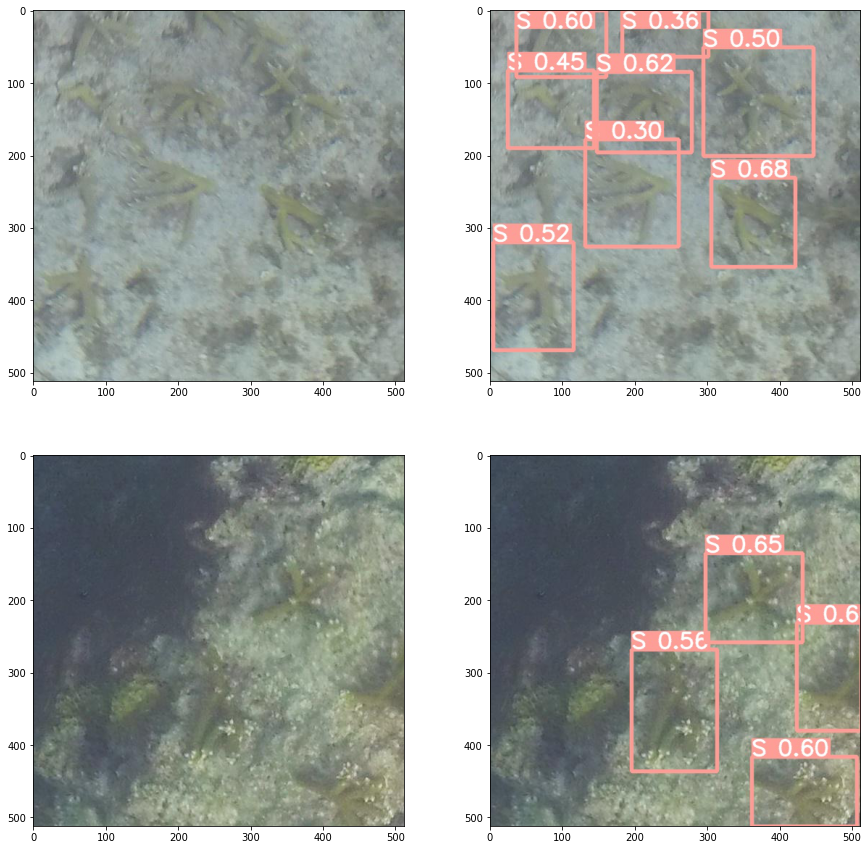

In [50]:
# Some Labelled and Predicted Staghorn Images

stag_Img1 = plt.imread(Img_DIR + 'staghorn-5-98-36_jpg.rf.120f8f737280a985b6fb5622ad65c3ef.jpg')
pred_Stag_Img1 = plt.imread(Pred_Img_DIR + 'staghorn-5-98-36_jpg.rf.120f8f737280a985b6fb5622ad65c3ef.jpg')

stag_Img2 = plt.imread(Img_DIR + 'staghorn-1-26-16_jpg.rf.8b0dc7a9f85a884ad165497db8de94ac.jpg')
pred_Stag_Img2 = plt.imread(Pred_Img_DIR + 'staghorn-1-26-16_jpg.rf.8b0dc7a9f85a884ad165497db8de94ac.jpg')

fig, axis = plt.subplots(2, 2, figsize=(15, 15))

axis[0, 0].imshow(stag_Img1)
axis[0, 1].imshow(pred_Stag_Img1)

axis[1, 0].imshow(stag_Img2)
axis[1, 1].imshow(pred_Stag_Img2)

In [59]:
results = pd.read_csv(DIR + 'runs/train/exp8/results.csv') 
results.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.100470,0.026989,0.026752,0.047229,0.14318,0.026857,0.006230,0.092866,0.021665,0.021149,0.070217,0.003309,0.003309
1,1,0.074880,0.029428,0.013823,0.344140,0.56122,0.387540,0.129720,0.066991,0.017994,0.003041,0.040086,0.006511,0.006511
2,2,0.065293,0.028346,0.007633,0.429240,0.42040,0.299090,0.080098,0.074050,0.018344,0.005960,0.009822,0.009581,0.009581
3,3,0.061943,0.026574,0.007135,0.513890,0.49312,0.408060,0.110280,0.071415,0.016862,0.002205,0.009406,0.009406,0.009406
4,4,0.057975,0.027158,0.006707,0.432280,0.41615,0.341760,0.080329,0.074255,0.015432,0.001975,0.009406,0.009406,0.009406


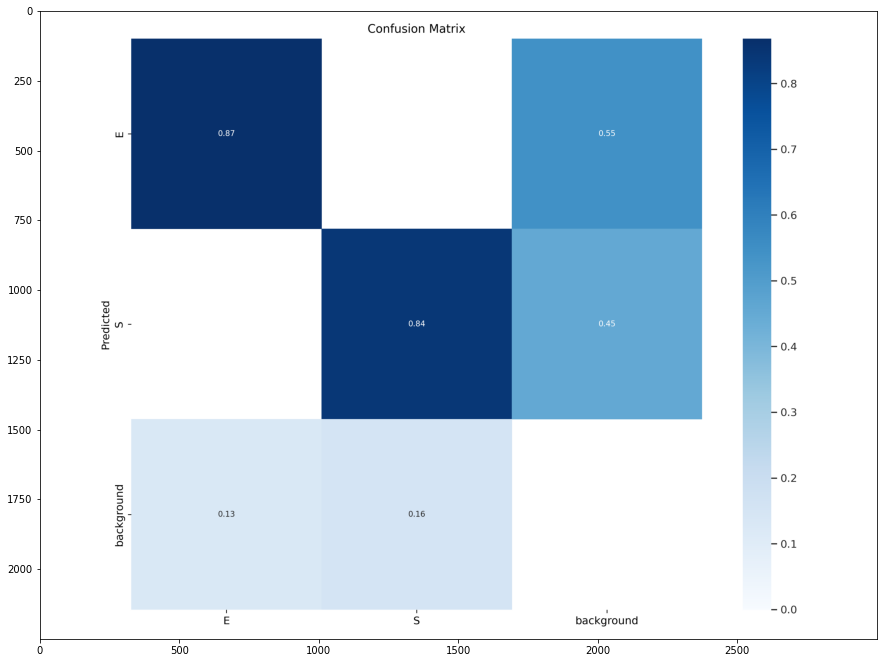

In [61]:
# Confusion Matrix

cm = plt.imread(DIR+'runs/train/exp8/confusion_matrix.png')
plt.figure(figsize=(15, 15))
plt.imshow(cm)